In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [3]:
#DataSet:   
#https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code  
#https://www.kaggle.com/code/noordeen/notebookac348e4669

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.model_selection import GridSearchCV

In [4]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [5]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
data['Class'].value_counts(normalize = 'True')

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

<Axes: >

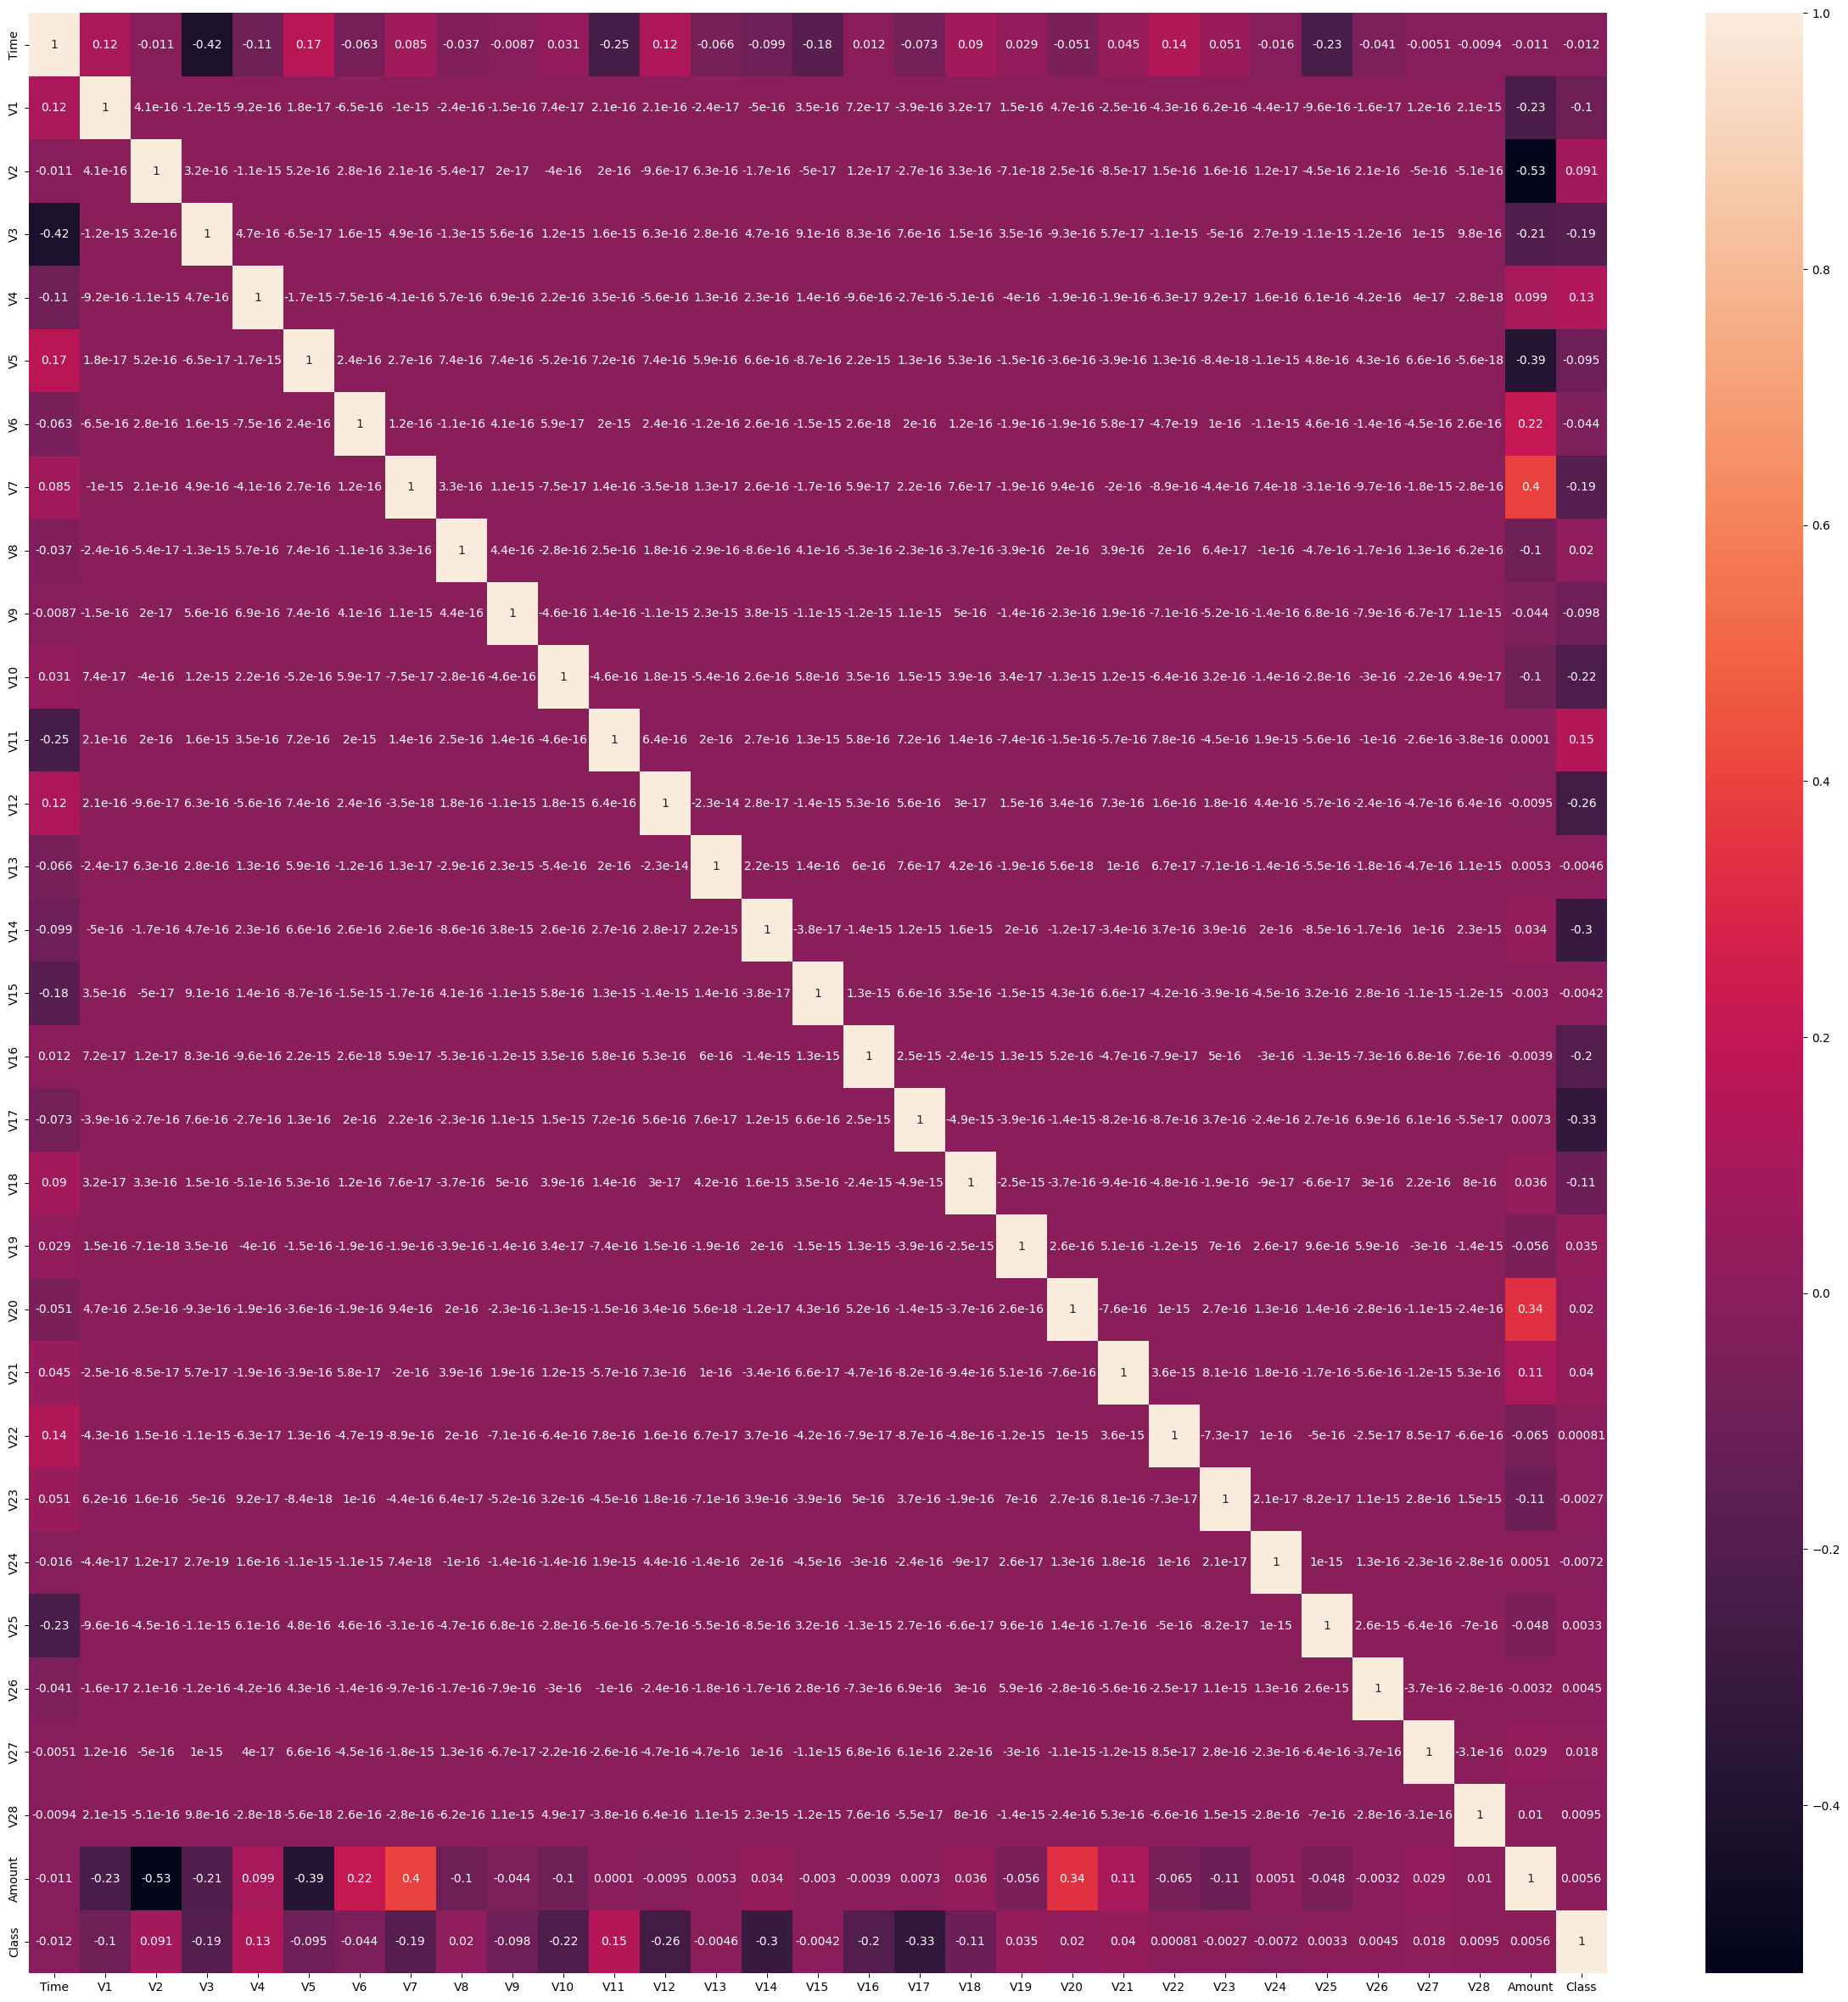

In [27]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot = True)

In [31]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [33]:
data.duplicated().sum()

1081

In [34]:
data.drop_duplicates(inplace = True)

In [35]:
data['Class'].value_counts(normalize = 'True')

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

In [36]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [37]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<Axes: xlabel='Class'>

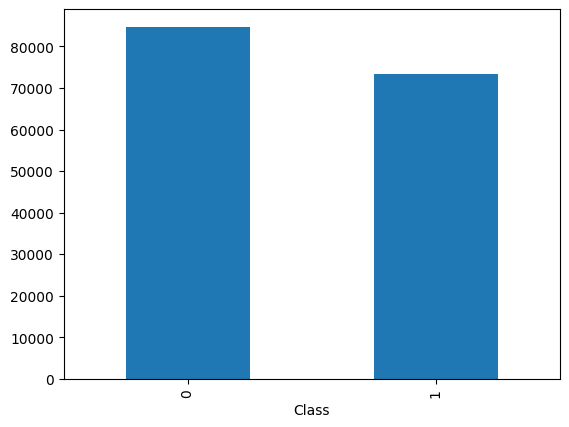

In [41]:
data.groupby('Class').Time.median().plot(kind = 'bar')

<Axes: xlabel='Class'>

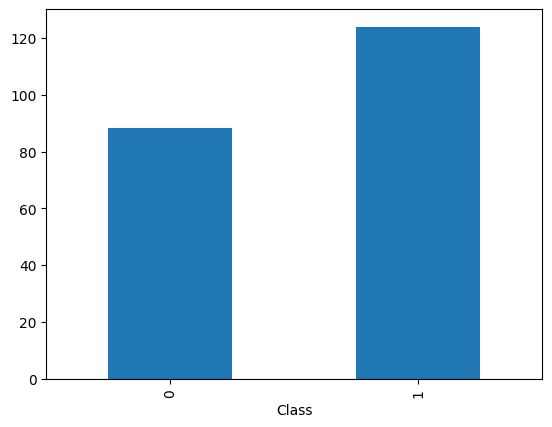

In [43]:
data.groupby('Class').Amount.mean().plot(kind = 'bar')

<Axes: xlabel='Class', ylabel='Amount'>

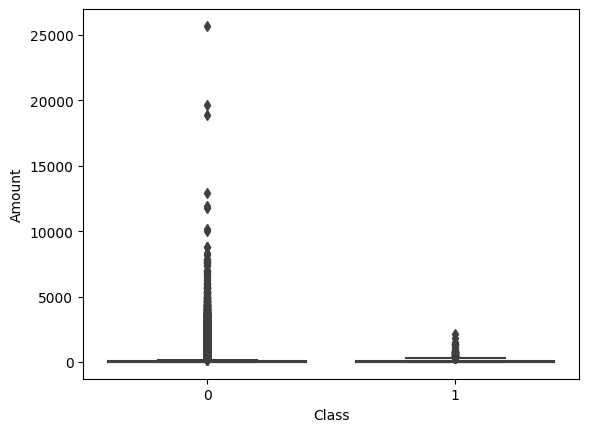

In [45]:
sns.boxplot(x = 'Class', y = 'Amount', data = data)

In [46]:
X = data.drop(columns = ['Class'])
y = data['Class']

In [60]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=12)

In [61]:
model_dt = DecisionTreeClassifier()
model_dt.fit(train_X,train_y)

DecisionTreeClassifier()

In [62]:
from sklearn import tree
text_representation = tree.export_text(model_dt)
print(text_representation)


|--- feature_17 <= -2.75
|   |--- feature_12 <= -2.18
|   |   |--- feature_26 <= -0.26
|   |   |   |--- feature_27 <= 1.07
|   |   |   |   |--- feature_14 <= -2.88
|   |   |   |   |   |--- feature_5 <= 4.11
|   |   |   |   |   |   |--- feature_26 <= -0.27
|   |   |   |   |   |   |   |--- feature_19 <= 2.54
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_19 >  2.54
|   |   |   |   |   |   |   |   |--- feature_20 <= 0.28
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_20 >  0.28
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_26 >  -0.27
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  4.11
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  -2.88
|   |   |   |   |   |--- feature_22 <= 2.07
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_22 >  2.07
|   |   |   |   |   |   |--- class: 1
|   |

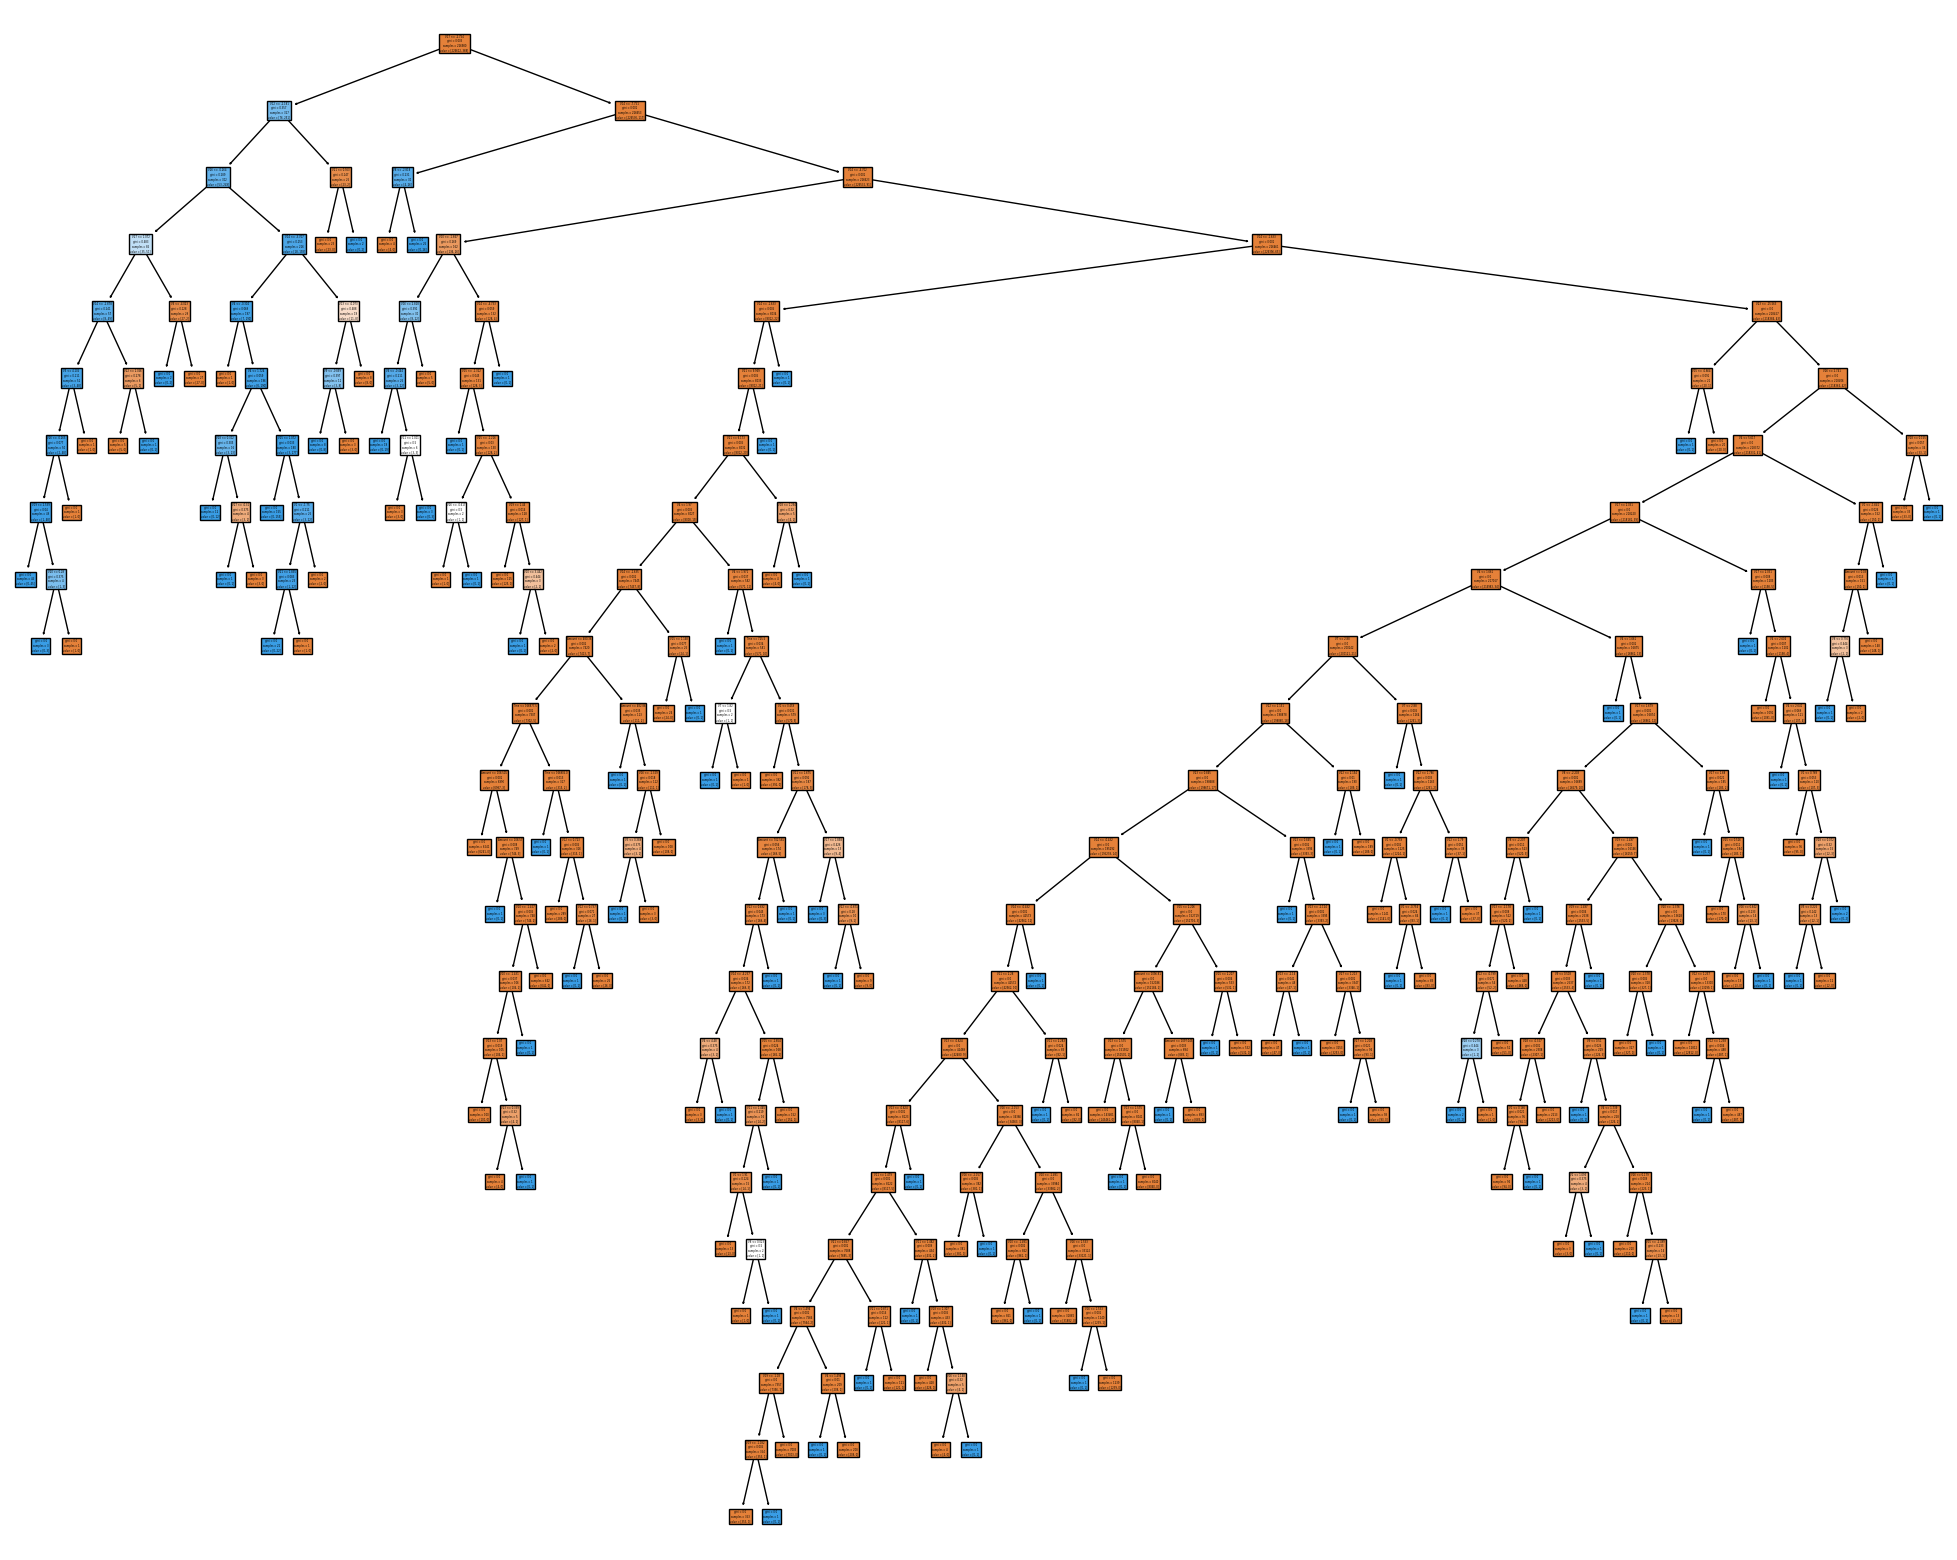

In [63]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt, feature_names=train_X.columns, filled=True)


In [64]:
train_pred = model_dt.predict(train_X)
print(confusion_matrix(train_y, train_pred))

[[226612      0]
 [     0    368]]


In [67]:
print(classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226612
           1       1.00      1.00      1.00       368

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



In [65]:
test_pred = model_dt.predict(test_X)
print(confusion_matrix(test_y, test_pred))

[[56596    45]
 [   32    73]]


In [66]:
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56641
           1       0.62      0.70      0.65       105

    accuracy                           1.00     56746
   macro avg       0.81      0.85      0.83     56746
weighted avg       1.00      1.00      1.00     56746



In [71]:
scale = StandardScaler()
train_X = pd.DataFrame(scale.fit_transform(train_X), columns = train_X.columns)
test_X = pd.DataFrame(scale.fit_transform(test_X), columns = test_X.columns)


In [72]:
train_X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.325823,-0.299626,0.109438,1.147238,-0.739269,0.088644,-0.578656,0.631358,-0.143023,0.417942,...,-0.044847,-0.307946,-0.925467,0.158960,-0.014483,-1.084008,0.226231,-0.319059,-0.247328,-0.165610
1,-1.216950,0.468262,-0.178866,0.125889,0.944020,-0.356731,-0.312878,0.074234,0.021456,0.272416,...,-0.037214,0.219093,0.161411,-0.280984,0.042002,0.911417,-0.535328,-0.018147,0.113962,0.226422
2,0.905208,0.065923,0.575493,-0.382807,-0.530561,0.832870,-0.202340,0.697354,0.074940,-0.192304,...,0.024788,-0.447459,-1.157841,0.058714,0.129826,-0.780562,0.257091,0.543734,0.206601,-0.339996
3,-1.268474,0.623213,0.177042,0.116134,0.660766,-0.054815,-0.345820,0.079274,-0.046634,-0.204850,...,-0.170823,0.078762,0.225093,-0.239821,0.017622,1.331002,-0.673741,0.017008,0.018581,-0.334431
4,0.829945,0.009832,0.465268,0.089252,-0.560224,0.465014,-0.375568,0.704580,0.019702,-0.173746,...,-0.077876,-0.327159,-0.766198,0.031074,-0.805947,-0.961169,0.317834,0.614770,0.244191,-0.347633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226975,0.875845,-0.280256,0.102978,0.944150,-0.864959,0.525288,-0.170466,0.534162,-0.074871,0.347688,...,0.051499,-0.325315,-0.966289,0.144308,0.725033,-1.076411,0.161234,-0.286826,-0.200974,-0.222439
226976,-1.183500,0.790727,-0.759422,-0.773865,-1.756082,0.708885,2.448475,-1.223490,0.632638,-1.812829,...,-0.225582,-0.357925,-0.734206,-0.021164,1.621397,1.041623,-0.399116,0.073021,0.048954,-0.246486
226977,-1.150155,0.614899,-0.053756,0.094816,0.133112,-0.395133,-0.690045,0.051691,-0.093157,0.081891,...,-0.133728,-0.027880,-0.041804,-0.126617,1.022842,0.874776,2.202312,-0.273733,-0.042679,-0.265091
226978,1.323422,-0.632154,0.962332,-0.599999,1.021879,-0.048072,-0.596398,0.194205,0.483740,-0.217610,...,-0.271530,0.260797,0.918162,-0.055497,-0.035025,0.126596,-0.776227,-0.614386,0.185560,-0.230116


In [73]:
def model_result(model_dt, train_X, test_X, train_y, test_y):
    model_dt.fit(train_X,train_y)
    train_pred = model_dt.predict(train_X)
    print('Train Confusion Matrix')
    print(confusion_matrix(train_y, train_pred))
    print('Test Confusion Matrix')
    test_pred = model_dt.predict(test_X)
    print(confusion_matrix(test_y, test_pred))
    print(classification_report(train_y, train_pred))
    print(classification_report(test_y, test_pred))

In [78]:
model_dt_scaled = DecisionTreeClassifier()

model_result(model_dt_scaled, train_X, test_X, train_y, test_y)

Train Confusion Matrix
[[226612      0]
 [     0    368]]
Test Confusion Matrix
[[56598    43]
 [   28    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226612
           1       1.00      1.00      1.00       368

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56641
           1       0.64      0.73      0.68       105

    accuracy                           1.00     56746
   macro avg       0.82      0.87      0.84     56746
weighted avg       1.00      1.00      1.00     56746



In [82]:
sample = RandomUnderSampler()
train_X_sample, train_y_sample = sample.fit_resample(train_X, train_y)


<Axes: >

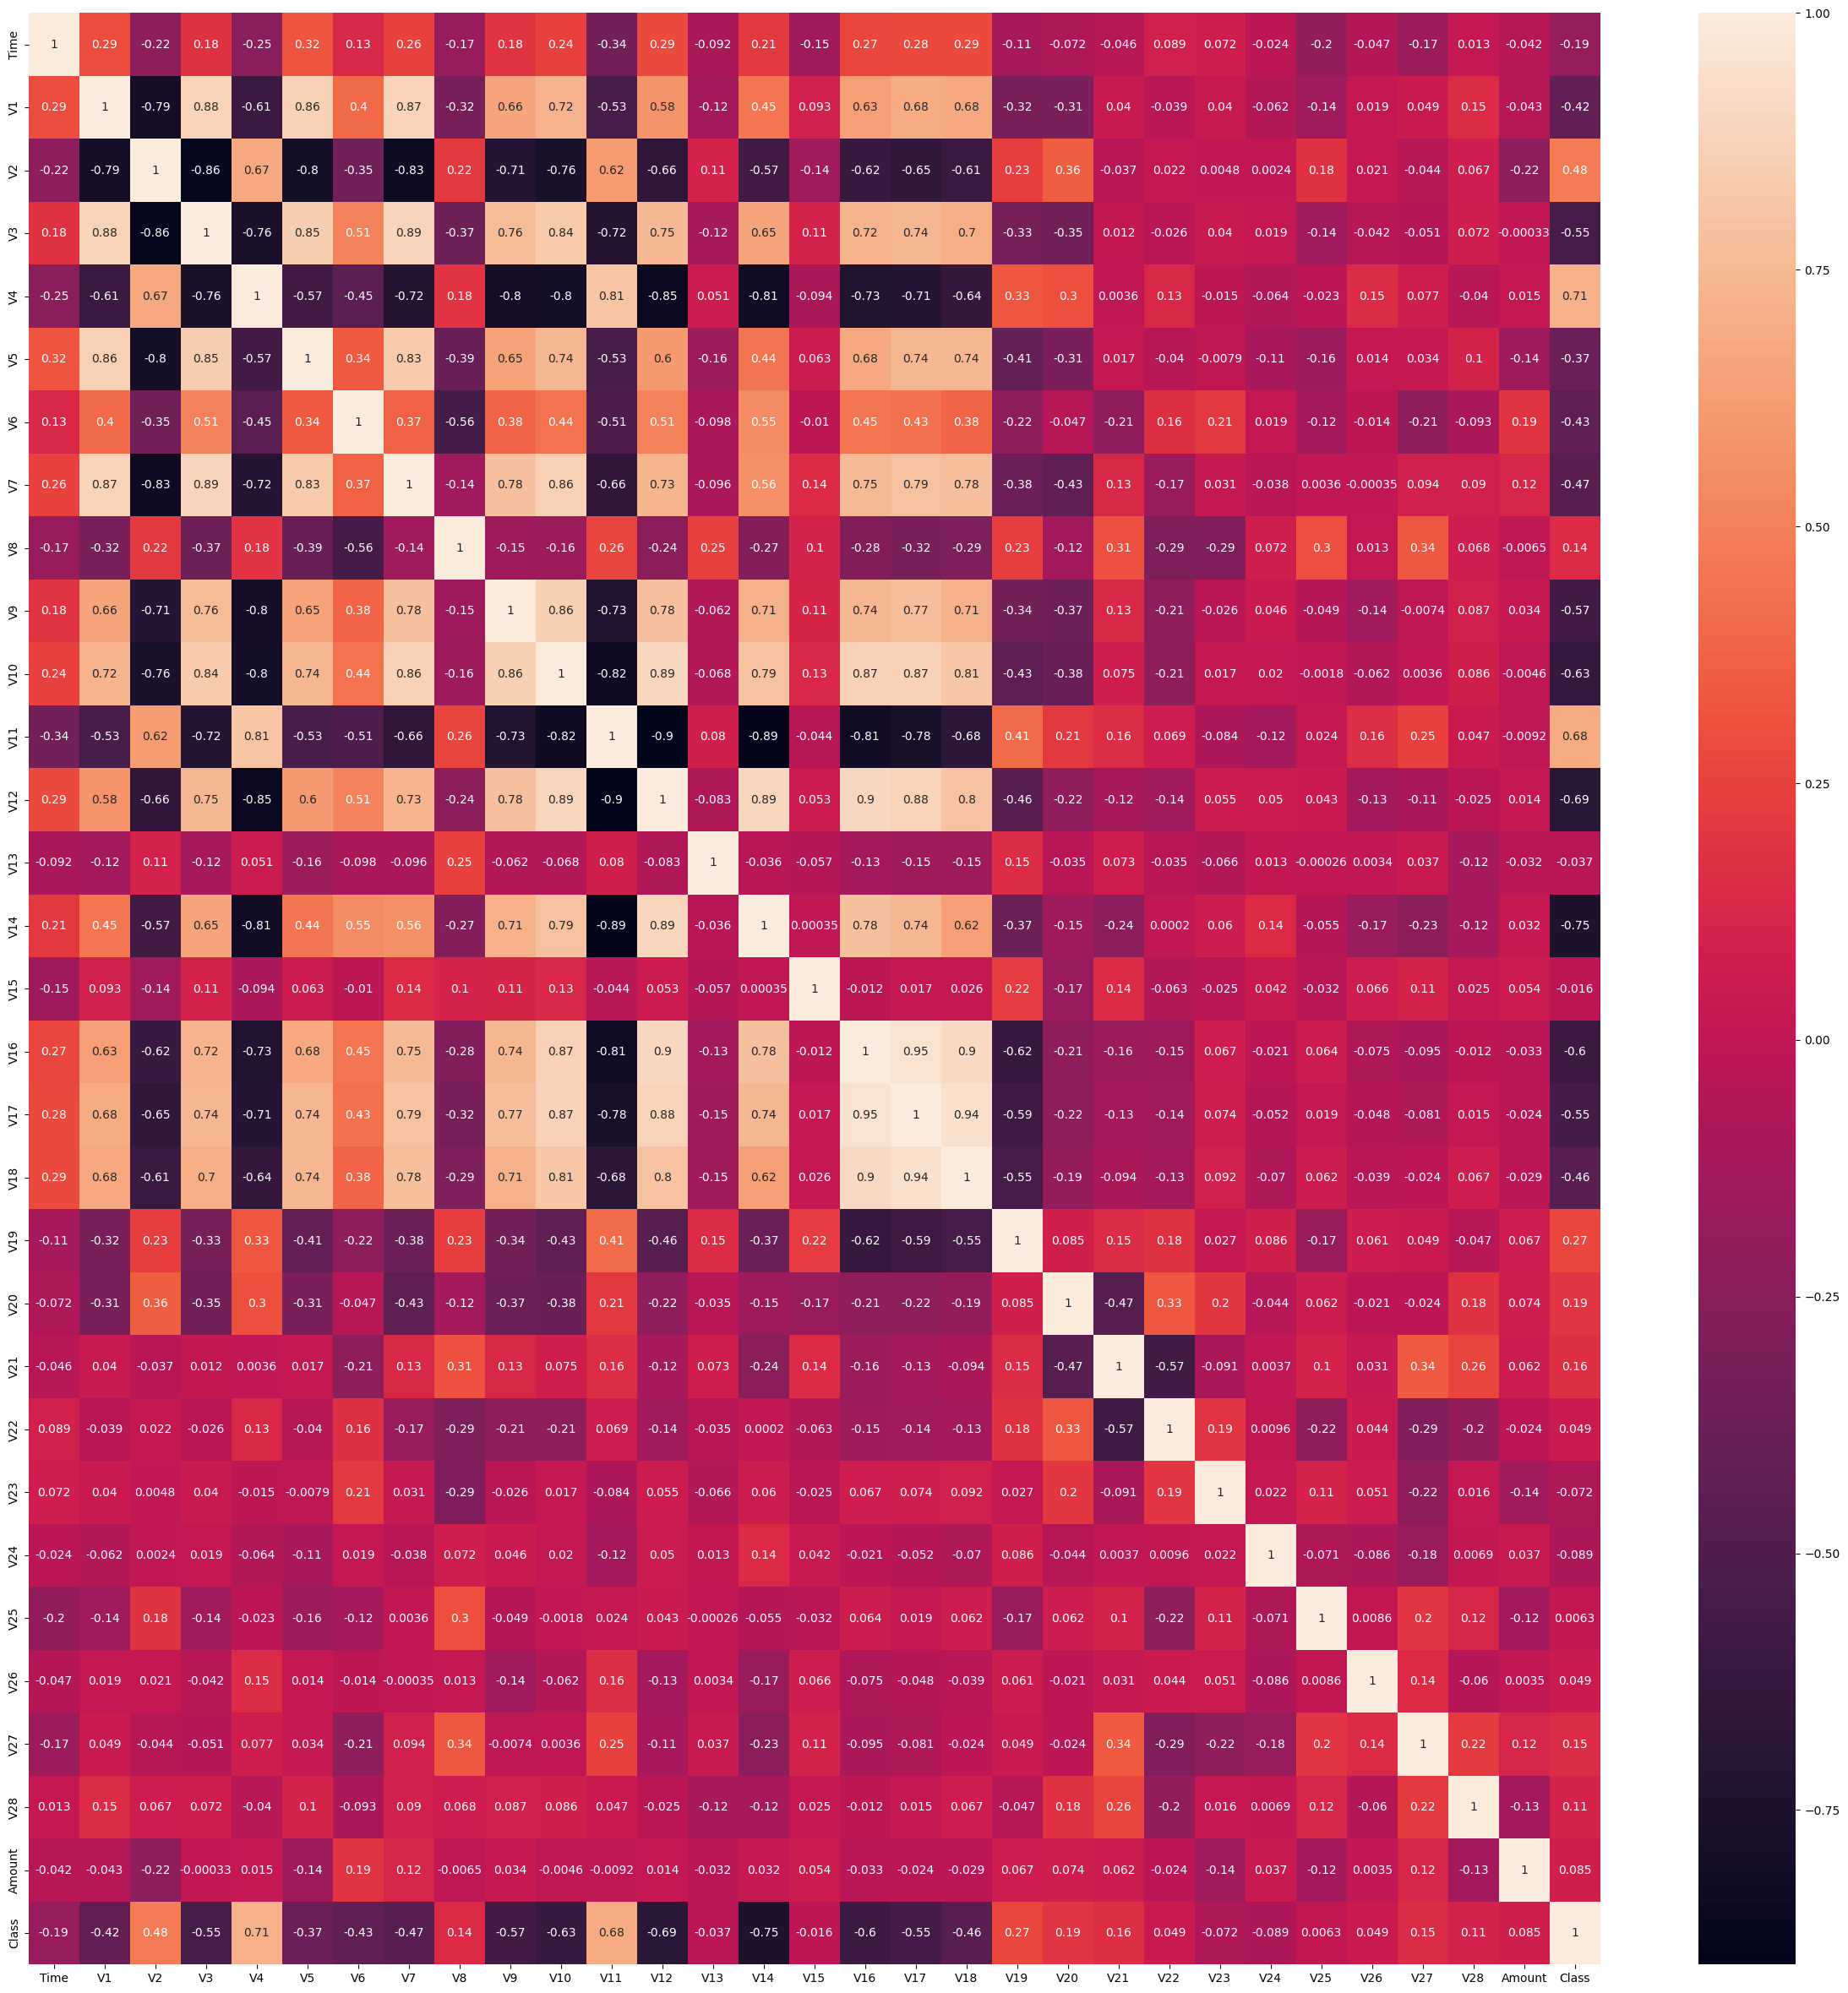

In [93]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.concat([train_X_sample, train_y_sample], axis  =1).corr(), annot = True)

In [83]:
model_dt_scaled = DecisionTreeClassifier()

model_result(model_dt_scaled, train_X_sample, test_X, train_y_sample, test_y)

Train Confusion Matrix
[[368   0]
 [  0 368]]
Test Confusion Matrix
[[51893  4748]
 [   14    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       368

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
weighted avg       1.00      1.00      1.00       736

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56641
           1       0.02      0.87      0.04       105

    accuracy                           0.92     56746
   macro avg       0.51      0.89      0.50     56746
weighted avg       1.00      0.92      0.95     56746



In [85]:
sample = RandomOverSampler()
train_X_over_sample, train_y_over_sample = sample.fit_resample(train_X, train_y)


In [86]:
model_dt_scaled = DecisionTreeClassifier()

model_result(model_dt_scaled, train_X_over_sample, test_X, train_y_over_sample, test_y)

Train Confusion Matrix
[[226612      0]
 [     0 226612]]
Test Confusion Matrix
[[56621    20]
 [   26    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226612
           1       1.00      1.00      1.00    226612

    accuracy                           1.00    453224
   macro avg       1.00      1.00      1.00    453224
weighted avg       1.00      1.00      1.00    453224

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56641
           1       0.80      0.75      0.77       105

    accuracy                           1.00     56746
   macro avg       0.90      0.88      0.89     56746
weighted avg       1.00      1.00      1.00     56746



In [94]:
model_rf = RandomForestClassifier()
model_result(model_rf, train_X, test_X, train_y, test_y)

Train Confusion Matrix
[[226612      0]
 [     0    368]]
Test Confusion Matrix
[[56634     7]
 [   24    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226612
           1       1.00      1.00      1.00       368

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56641
           1       0.92      0.77      0.84       105

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [95]:
model_rf = RandomForestClassifier(class_weight = 'balanced')
model_result(model_rf, train_X, test_X, train_y, test_y)

Train Confusion Matrix
[[226612      0]
 [     2    366]]
Test Confusion Matrix
[[56635     6]
 [   25    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226612
           1       1.00      0.99      1.00       368

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56641
           1       0.93      0.76      0.84       105

    accuracy                           1.00     56746
   macro avg       0.96      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [96]:
model_rf = RandomForestClassifier(class_weight = 'balanced')
model_result(model_rf, train_X_sample, test_X, train_y_sample, test_y)

Train Confusion Matrix
[[368   0]
 [  0 368]]
Test Confusion Matrix
[[55028  1613]
 [    9    96]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       368

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
weighted avg       1.00      1.00      1.00       736

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56641
           1       0.06      0.91      0.11       105

    accuracy                           0.97     56746
   macro avg       0.53      0.94      0.55     56746
weighted avg       1.00      0.97      0.98     56746



In [109]:
model_rf[7]

DecisionTreeClassifier(max_features='sqrt', random_state=519059331)

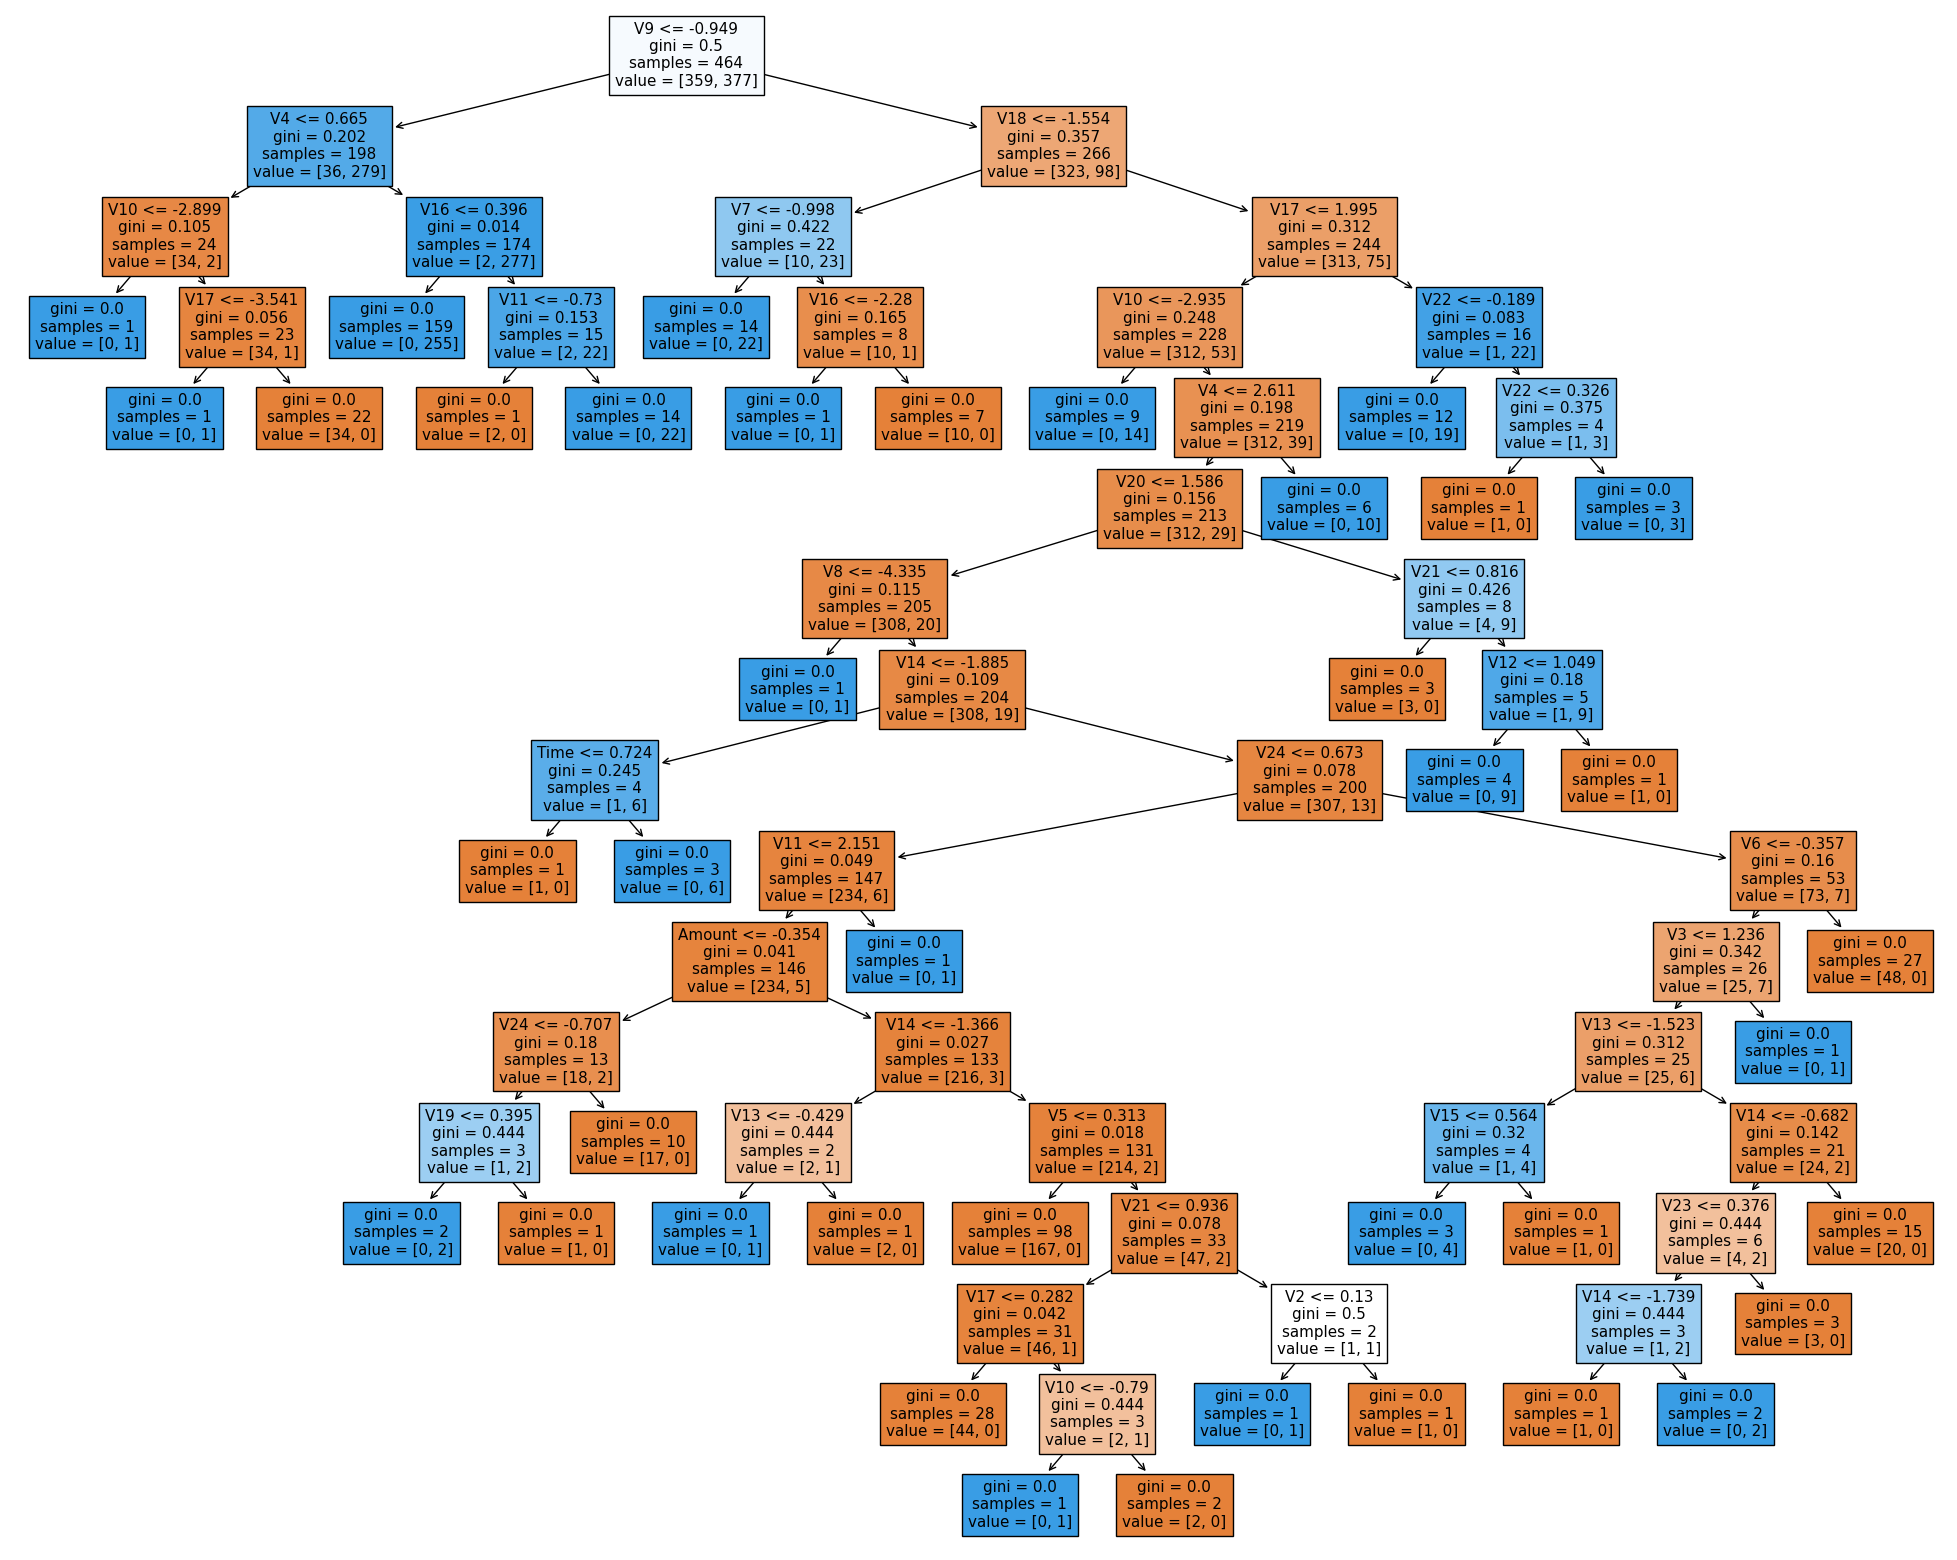

In [104]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_rf[9], feature_names=train_X.columns, filled=True)


In [113]:
model_rf_tune = RandomForestClassifier()

In [114]:
params = { 'n_estimators' : [100,150,200,250, 500, 1000],
           'criterion': ['gini','entropy'],
           'max_depth': [1,2,3,4,5,6,7,8,9,10,12,13,14,15],
           'class_weight' : [None,"balanced", "balanced_subsample"]
}

In [123]:
grid = GridSearchCV(estimator=model_rf_tune, param_grid=params, verbose=10, scoring = 'f1', cv = 2)

In [124]:
grid.fit(train_X_sample, train_y_sample)

Fitting 2 folds for each of 504 candidates, totalling 1008 fits
[CV 1/2; 1/504] START class_weight=None, criterion=gini, max_depth=1, n_estimators=100
[CV 1/2; 1/504] END class_weight=None, criterion=gini, max_depth=1, n_estimators=100;, score=0.901 total time=   0.2s
[CV 2/2; 1/504] START class_weight=None, criterion=gini, max_depth=1, n_estimators=100
[CV 2/2; 1/504] END class_weight=None, criterion=gini, max_depth=1, n_estimators=100;, score=0.892 total time=   0.2s
[CV 1/2; 2/504] START class_weight=None, criterion=gini, max_depth=1, n_estimators=150
[CV 1/2; 2/504] END class_weight=None, criterion=gini, max_depth=1, n_estimators=150;, score=0.905 total time=   0.4s
[CV 2/2; 2/504] START class_weight=None, criterion=gini, max_depth=1, n_estimators=150
[CV 2/2; 2/504] END class_weight=None, criterion=gini, max_depth=1, n_estimators=150;, score=0.889 total time=   0.4s
[CV 1/2; 3/504] START class_weight=None, criterion=gini, max_depth=1, n_estimators=200
[CV 1/2; 3/504] END class_wei

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13,
                                       14, 15],
                         'n_estimators': [100, 150, 200, 250, 500, 1000]},
             scoring='f1', verbose=10)

Bagging - Bootstrap

In [125]:
grid.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=12)

In [126]:
grid.best_score_

0.9362464985994399

In [127]:
model_rf_tuned = RandomForestClassifier(class_weight='balanced_subsample', max_depth=12)
model_result(model_rf_tuned, train_X_sample, test_X, train_y_sample, test_y)

Train Confusion Matrix
[[368   0]
 [  1 367]]
Test Confusion Matrix
[[55043  1598]
 [    8    97]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       368

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
weighted avg       1.00      1.00      1.00       736

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56641
           1       0.06      0.92      0.11       105

    accuracy                           0.97     56746
   macro avg       0.53      0.95      0.55     56746
weighted avg       1.00      0.97      0.98     56746



In [140]:
feature_importance = model_rf_tuned.feature_importances_
feature_columns = train_X.columns.values
important = pd.DataFrame({"Feature":feature_columns, "Importance":feature_importance})
important = important.sort_values(by = 'Importance', ascending = False)

<Axes: xlabel='Importance', ylabel='Feature'>

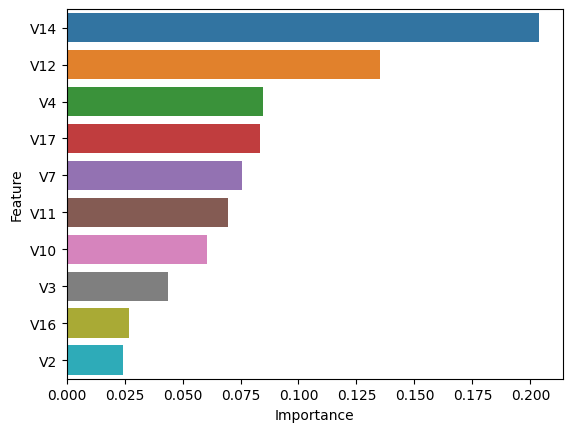

In [143]:
sns.barplot(x= 'Importance', y = 'Feature', data =important.head(10))

In [131]:
feature_columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [132]:
feature_importance

array([0.00591604, 0.00700821, 0.02430765, 0.04389486, 0.08450663,
       0.00741334, 0.00790557, 0.07557292, 0.00766013, 0.01511834,
       0.06041338, 0.06941324, 0.13510758, 0.00674872, 0.20363971,
       0.00643801, 0.02674419, 0.08349584, 0.01591864, 0.01481412,
       0.01081813, 0.02421033, 0.00685722, 0.00629897, 0.0050802 ,
       0.00575789, 0.00519391, 0.01055515, 0.00651213, 0.01667895])

In [147]:
important_columns = important['Feature'].head(10).values

In [149]:
model_rf_tuned = RandomForestClassifier(class_weight='balanced_subsample', max_depth=12, oob_score = True)
model_result(model_rf_tuned, train_X_sample[important_columns], test_X[important_columns], train_y_sample, test_y)

Train Confusion Matrix
[[368   0]
 [  0 368]]
Test Confusion Matrix
[[53862  2779]
 [    8    97]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       368

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
weighted avg       1.00      1.00      1.00       736

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56641
           1       0.03      0.92      0.07       105

    accuracy                           0.95     56746
   macro avg       0.52      0.94      0.52     56746
weighted avg       1.00      0.95      0.97     56746



In [152]:
model_rf_tuned.oob_score_

0.9334239130434783

In [163]:
train_X_sample = train_X_sample[important_columns].reset_index().drop(columns = 'index')
train_y_sample = train_y_sample.reset_index().drop(columns = 'index')

In [169]:
data_sample_scale = pd.concat([train_X_sample, train_y_sample], axis = 1)

<Axes: >

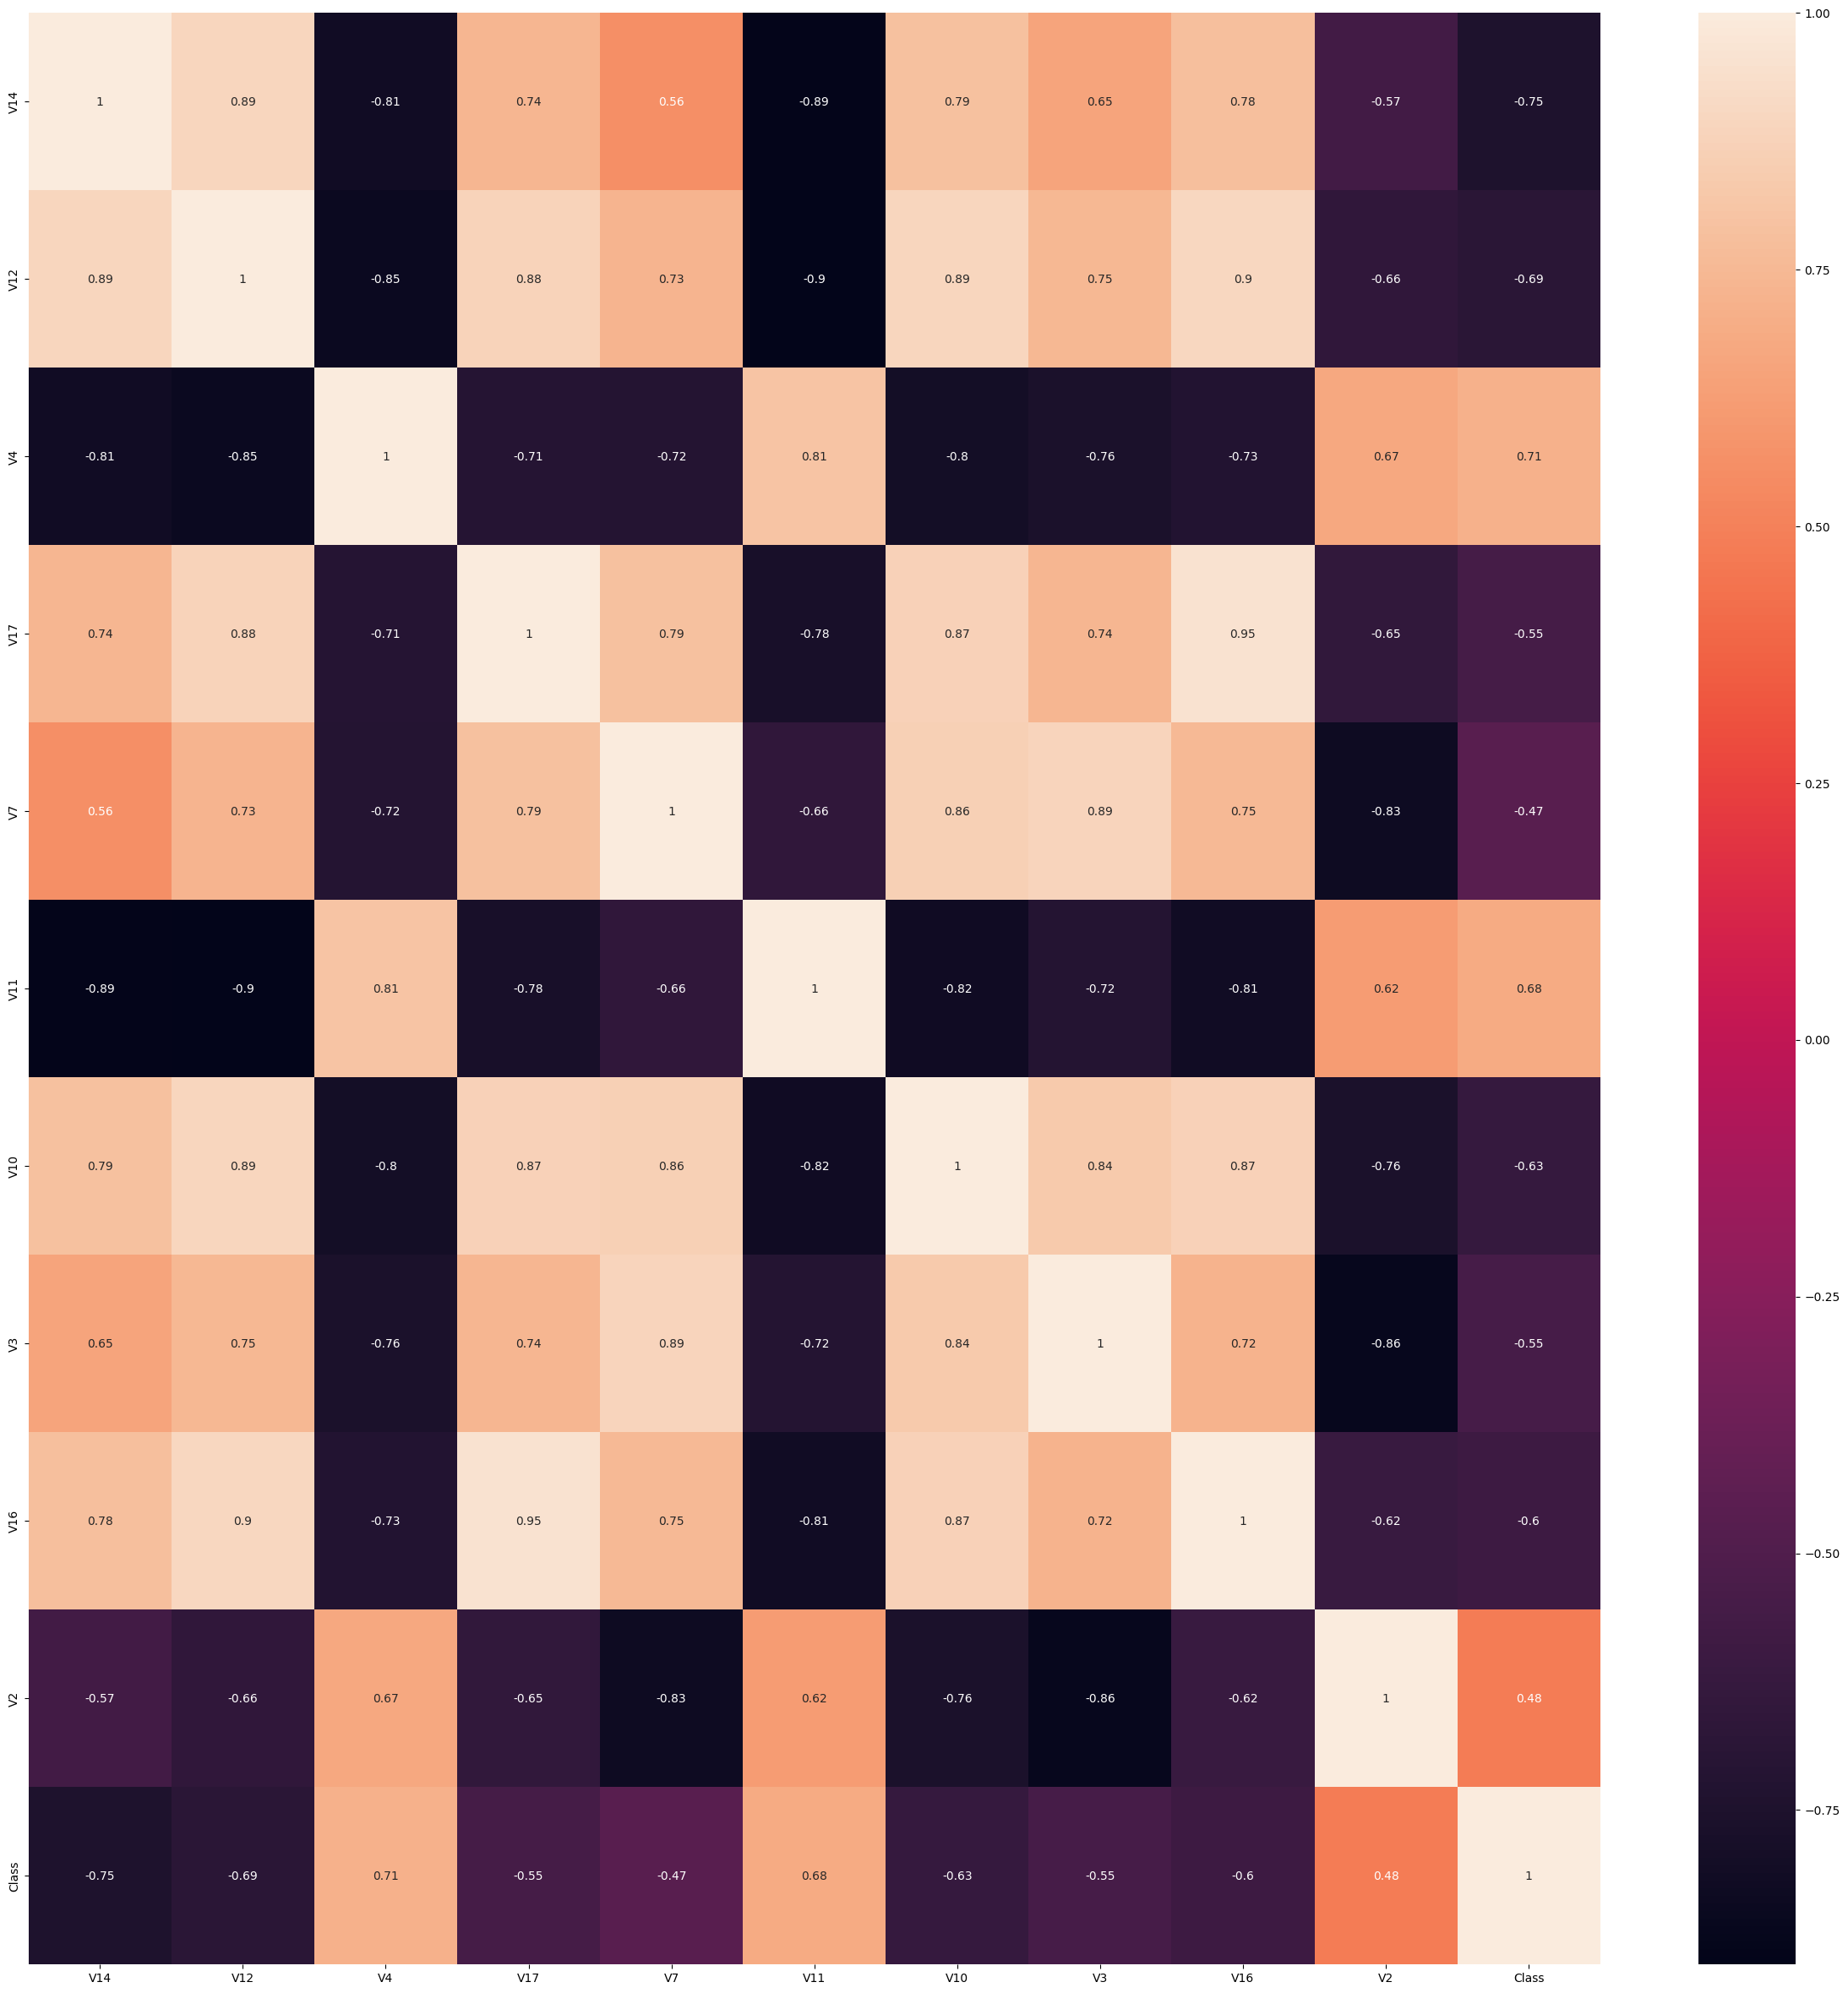

In [168]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.concat([train_X_sample, train_y_sample], axis = 1).corr(), annot = True)

<Axes: xlabel='Class', ylabel='V14'>

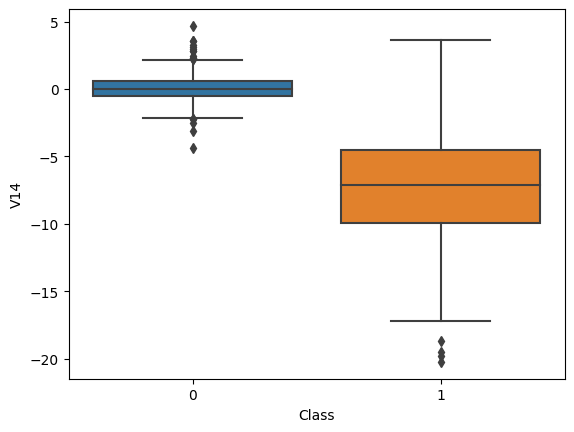

In [170]:
sns.boxplot(x = 'Class', y = 'V14', data = data_sample_scale)

<Axes: xlabel='Class', ylabel='V2'>

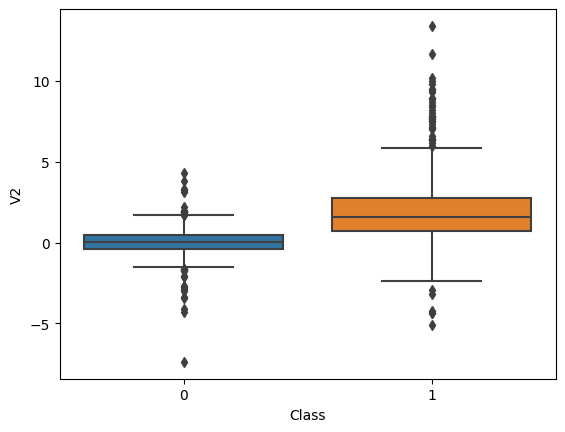

In [172]:
sns.boxplot(x = 'Class', y = 'V2', data = data_sample_scale)

<Axes: xlabel='V14', ylabel='V12'>

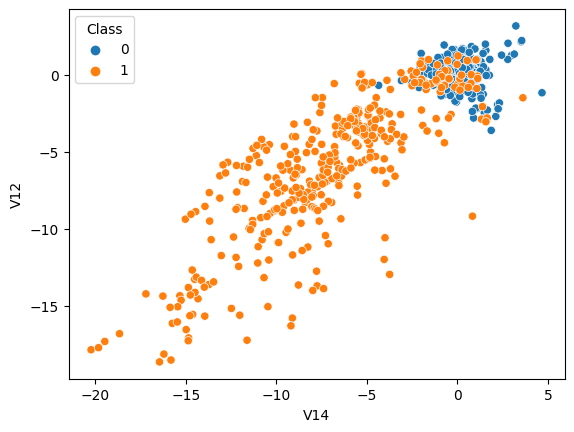

In [173]:
sns.scatterplot(x = 'V14', y = 'V12', hue = 'Class',data = data_sample_scale)

In [174]:
from sklearn.feature_selection import SelectKBest, chi2

In [183]:
sel = SelectKBest(k = 5)
x_train_selected = sel.fit_transform(train_X_sample, train_y_sample)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [184]:
x_train_selected.shape

(736, 5)